## Difference between dimensionality reducion and feature selection

* Both methods tend to reduce the number of attributes in the dataset
* A dimensionality reduction method does so by creating new combinations of attributes (sometimes known as feature transformation)
* Feature selection methods include and exclude attributes present in the data without changing them

## Common dimentionality reduction methods

* PCA
* SVD (Singular Value Decomposition) 
* Linear Discriminant Analysis

## General feature selection methods

* Filter method
    * chi-square test
    * correlation coefficient
    * variance threshold

* Wrapper method
    * RFE (Recursive Feature Elimination)

* Embedded method
    * L1  regularization - LASSO regression
    * L2 regularization - Ridge regression

## Different correlation coefficiencts for different types of data
![Image](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549804/Image1_c4jcxi.png)

## Feature selection using Chi-squared test

In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv("sample_data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome 1 means that the observation has diabetes and 0 means does not.

In [10]:
array = data.values
X = array[:, :-1]
Y = array[:, -1]

In [11]:
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [12]:
# Use Chi-squared statistical test for non-negative features to select 4 of the best features from the dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_) # score for each attribution
# this will help you further in determining the best features for training the model


[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


The higher score, the more important the feature is

In [14]:
features = fit.transform(X)
print(features[0:5,:])
print(features.shape)

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]
(768, 4)


**Notes:**
卡方检验就是统计样本的实际观测值与理论推断值之间的偏离程度，偏离程度决定了卡方值的大小，卡方值越大，越不符合；卡方值越小，偏差越小，越趋于符合；若两个值完全相等，卡方值就为0，表明理论值完全符合。

## Pearson correlation （-1 ~ 1）


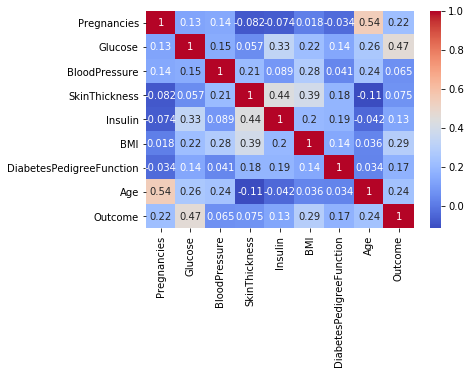

In [70]:
# check correlation between variables
sns.heatmap(corrmap, annot=True, cmap='coolwarm')

From this result, we can get that all features have positive correlation with Outcome and features are not strongly linearly dependent. Therefore all of them can be used as features to predict Y

## Feature selection using RFE

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear') #'lbfgs' solver generated reaching to the limit iteration warning. Need to figure out why
rfe = RFE(model, 3) # selection top 3 features
fit = rfe.fit(X, Y)
print(f'Num Feature {fit.n_features_}')
print(f'Selected Feature is {fit.support_}')
print(f'Feature ranking is {fit.ranking_}')

Num Feature 3
Selected Feature is [ True False False False False  True  True False]
Feature ranking is [1 2 3 5 6 1 1 4]


## Why did RFE select different features from Chi-squared Test?

## Use Ridge regression to determine the coefficient $R^2$

In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X, Y)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
# a helpter method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names=None, sort=False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [31]:
print("Ridge model: ", pretty_print_coefs(ridge.coef_))

Ridge model:  0.021 * X0 + 0.006 * X1 + -0.002 * X2 + 0.0 * X3 + -0.0 * X4 + 0.013 * X5 + 0.145 * X6 + 0.003 * X7


In [29]:
ridge.coef_

array([ 0.021,  0.006, -0.002,  0.   , -0.   ,  0.013,  0.145,  0.003])

**Notes**:<br>
1. It is also known as L2-Regularization. <br>
    Because ridge optimize this: Objective = RSS + α * (sum of square of coefficients)<br>
2. <mark>For correlated features, it means that they tend to get similar coefficients. </mark> <br>
    Does it mean that only one feature can be left if there are multiple features with the same coefficients?
3. Feature having negative coefficients don't contribute that much. But in a more complex scenario where you are dealing with lots of features, then this score will definitely help you in the ultimate feature selection decision-making process.

## Reference
https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/#three
https://sebastianraschka.com/faq/docs/feature_sele_categories.html